# Script for formatting a pupil array into a grid sag file for zemax

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [ ]:
def create_sag_file(file_name, pupil, aperture, unit, target_wl):
    """
    Creates a sag file formatted for Zemax
    file_name: Name for the file
    Pupil: complex array
    unit: unit of measurement (mm, cm, m, in)
    aperture: telescope aperture in units of 'unit'
    target_wl: ideal wavelength in units of 'unit'
    """
    unit_dict = {"mm": 0, "cm": 1, "in": 2, "m": 3}
    phase_range = 2*np.pi
    
    nx = pupil.shape[0]
    ny = pupil.shape[1]
    delx = aperture/nx
    dely = aperture/ny
    unitflag  = unit_dict[unit]
    xdec = 0
    ydec = 0
    
    with open("{}_sag.DAT".format(file_name), 'w') as f:
        f.write("{} {} {} {} {} {} {}\n".format(nx, ny, delx, dely, unitflag, xdec, ydec))
        
        for i in range(nx):
            for j in range(ny):
                sag_ratio = np.angle(pupil[i][j])/phase_range
                sag_val = sag_ratio*target_wl
                f.write("{} {} {} {} {}\n".format(sag_val, 0, 0, 0, 0))
                
def create_phase_file(file_name, pupil, aperture, unit):
    """
    Creates a sag file formatted for Zemax
    file_name: Name for the file
    Pupil: complex array
    unit: unit of measurement (mm, cm, m, in)
    aperture: telescope aperture in units of 'unit'
    """
    unit_dict = {"mm": 0, "cm": 1, "in": 2, "m": 3}
    
    nx = pupil.shape[0]
    ny = pupil.shape[1]
    delx = aperture/nx
    dely = aperture/ny
    unitflag  = unit_dict[unit]
    xdec = 0
    ydec = 0
    
    with open("{}_phase.DAT".format(file_name), 'w') as f:
        f.write("{} {} {} {} {} {} {}\n".format(nx, ny, delx, dely, unitflag, xdec, ydec))
        
        for i in range(nx):
            for j in range(ny):
                phase_val = np.angle(pupil[i][j])
                f.write("{} {} {} {} {}\n".format(phase_val, 0, 0, 0, 0))  
                
def generate_array_from_fits(fits_file, offset=0):
    """
    Takes in the fits file and returns a complex array of the pupil
    """
    import math

    gridsize = fits_file.shape[0] - 2*offset
    c = gridsize//2
    pupil = np.zeros((gridsize-offset,gridsize-offset), dtype=complex)

    for i in range(gridsize):
        for j in range(gridsize):
            x = i - c
            y = j - c 
            r = math.hypot(x, y)
            if r >= (gridsize//2) + offset:
                pupil[i][j] = np.complex(0,0)
            else:
                pupil[i][j] = np.exp(1j*fits_file[i][j])
        
    return pupil

In [10]:
pupil_name = "pupil_4k.fits"
pupil_file = fits.open(pupil_name)[0].data
pupil = generate_array_from_fits(pupil_file)

(4000, 4000)


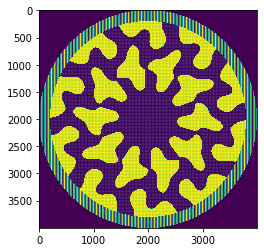

In [11]:
plt.imshow(np.abs(np.angle(pupil)))
print(pupil.shape)

In [12]:
create_sag_file("test_pupil_4k", pupil, 0.1, "m", 600e-9)

In [ ]:
create_phase_file("test_pupil_4k", pupil, 0.1, "m")